# Housing prices - Data Analysis and Predicting Market Value

### Import necessary libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Read dataset into notebook and display it

In [49]:
data = pd.read_csv('regression_data.csv')
data.head(3)

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000

### Check nuber of rows and columns

In [50]:
data.shape

(21597, 21)

### columns meaning https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [51]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [53]:
data.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

### Initial observations/ to-do:
- 'id' column redundant for our purpose, as it simply represent a unit entry. I will remove it.
- change 'bathrooms', 'floors' to integer as decimal for example 2.25 number of bathrooms does not make sence practically 
- possibly combine 'bedrooms' and 'bathrooms' columns into number of rooms total. first try and check the importance of them separately (correlation with our target value 'price') 

In [54]:
#drop 'id' as it is not needed for our purpose and our data will be lighter for it
data = data.drop(['id'], axis=1)
data.head(2)

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  10/13/14         3       1.00         1180      5650     1.0           0   
1   12/9/14         3       2.25         2570      7242     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  
0    98178  47.5112 -122.257           1340        5650  221900  
1    98125  47.7210 -122.319           1690        7639  538000

<AxesSubplot:>

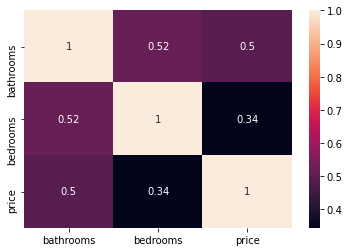

In [55]:
sns.heatmap(data[["bathrooms","bedrooms","price"]].corr(method="spearman"),annot=True)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

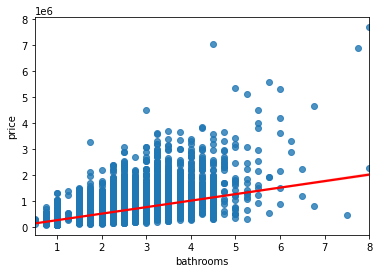

In [56]:
sns.regplot(data['bathrooms'], data['price'], line_kws={"color": "red"})

the column have somewhat statistical importance. Will test again after combining them.

In [57]:
data["rooms"]= data["bathrooms"]+data["bedrooms"]
data["rooms"]

0        4.00
1        5.25
2        3.00
3        7.00
4        5.00
         ... 
21592    5.50
21593    6.50
21594    2.75
21595    5.50
21596    2.75
Name: rooms, Length: 21597, dtype: float64

<AxesSubplot:>

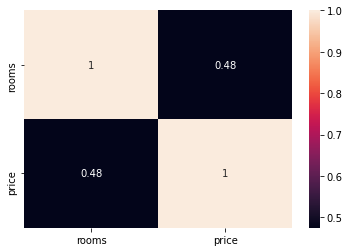

In [58]:
sns.heatmap(data[["rooms","price"]].corr(method="spearman"),annot=True)

<AxesSubplot:xlabel='rooms', ylabel='price'>

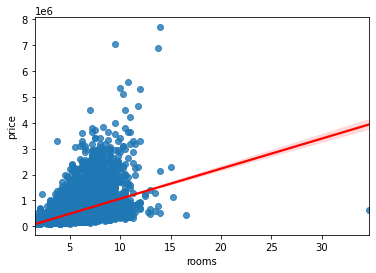

In [59]:
sns.regplot(data['rooms'], data['price'], line_kws={"color": "red"})

Resulted in value ending in between what the correlation was when separate. It should not have an impact later on our model too much.

In [60]:
data.drop(["bathrooms","bedrooms"], axis=1, inplace=True)
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650     1.0           0     0          3   
1   12/9/14         2570      7242     2.0           0     0          3   

   grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0      7        1180              0      1955             0    98178  47.5112   
1      7        2170            400      1951          1991    98125  47.7210   

      long  sqft_living15  sqft_lot15   price  rooms  
0 -122.257           1340        5650  221900   4.00  
1 -122.319           1690        7639  538000   5.25

'sqft_living' is the sum of 'sqft_above' and 'sqft_basement'. Lets check if we can delete 'sqft_above' and 'sqft_basement' and have 'sqft_living'  represent it

<AxesSubplot:>

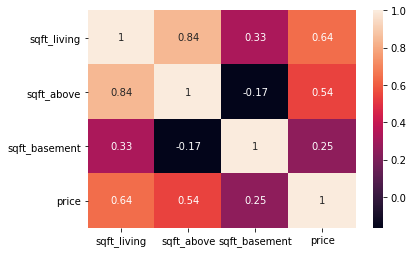

In [61]:
sns.heatmap(data[["sqft_living", "sqft_above", "sqft_basement", "price"]].corr(method="spearman"),annot=True)

In [62]:
data.drop(["sqft_above","sqft_basement"],axis=1,inplace=True)
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650     1.0           0     0          3   
1   12/9/14         2570      7242     2.0           0     0          3   

   grade  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      7      1955             0    98178  47.5112 -122.257           1340   
1      7      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  
0        5650  221900   4.00  
1        7639  538000   5.25

The decimals for 'floors' and 'rooms' column is unessary. Change to Integer as follows. 

In [63]:
data['floors'] = data['floors'] .astype(int)

In [64]:
data['rooms'] = data['rooms'] .astype(int)

In [65]:
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650       1           0     0          3   
1   12/9/14         2570      7242       2           0     0          3   

   grade  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      7      1955             0    98178  47.5112 -122.257           1340   
1      7      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  
0        5650  221900      4  
1        7639  538000      5

In [66]:
data.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_living15    0.585241
rooms            0.463766
view             0.397370
lat              0.306692
waterfront       0.266398
floors           0.237264
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

### Lets split the 'date' column in to three parts: day, month and year and enrich data in this way.

In [67]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop(['date'], axis=1)

data.head(2)

sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0         1180      5650       1           0     0          3      7   
1         2570      7242       2           0     0          3      7   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  year  month  day  
0        5650  221900      4  2014     10   13  
1        7639  538000      5  2014     12    9

Lets check distributions

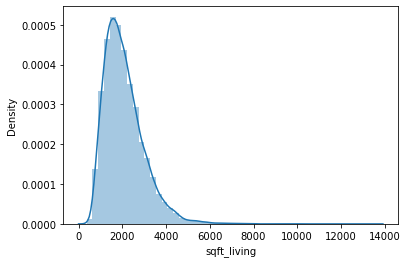

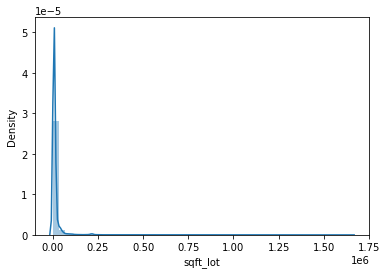

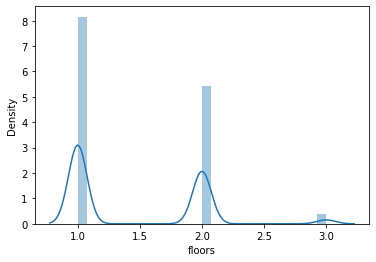

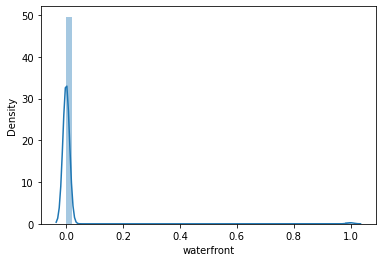

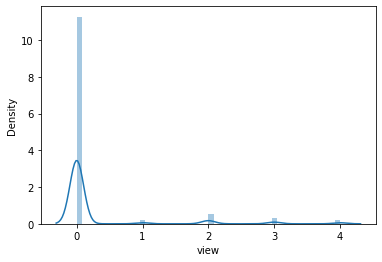

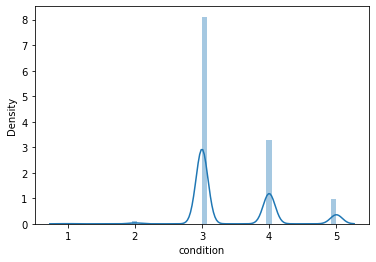

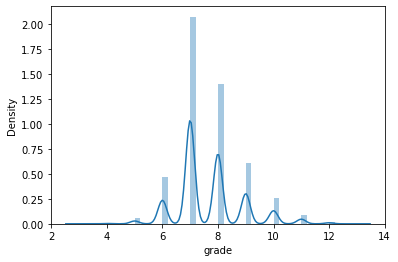

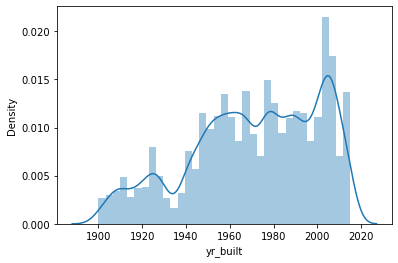

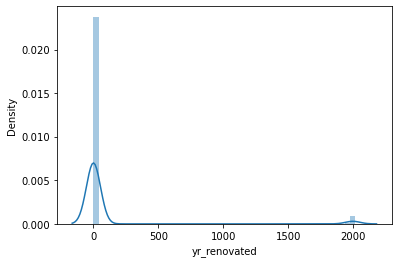

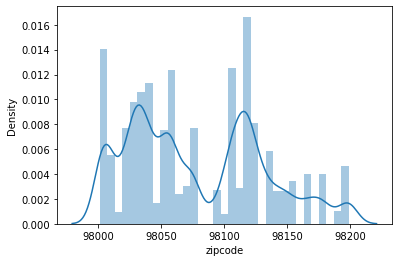

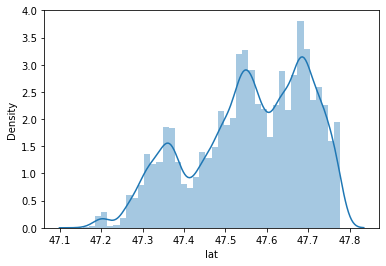

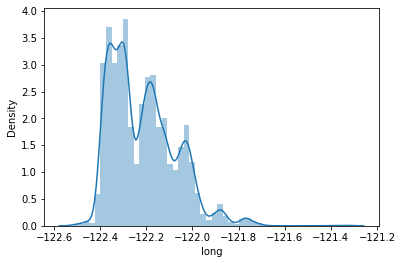

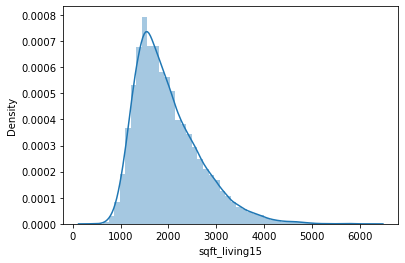

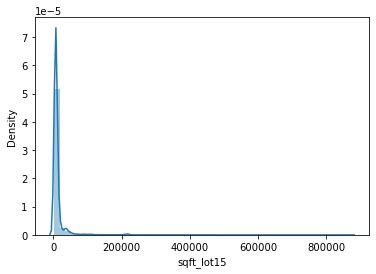

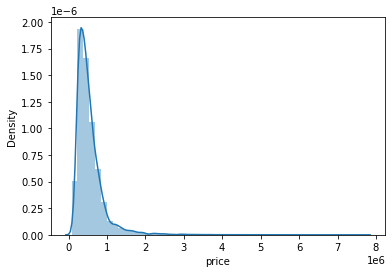

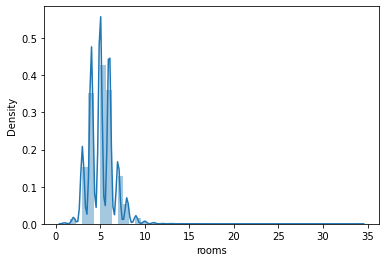

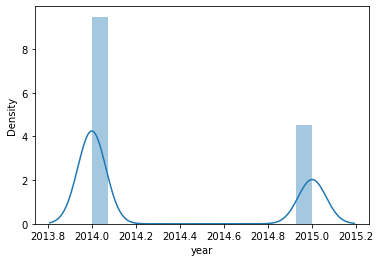

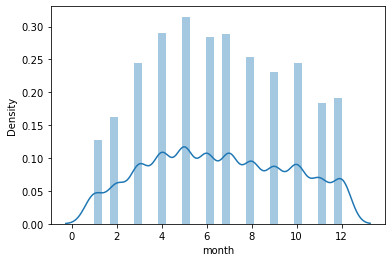

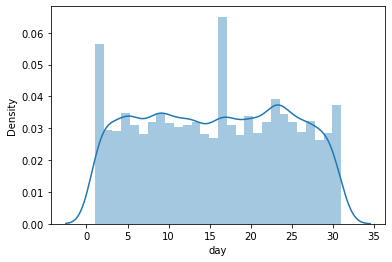

In [68]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

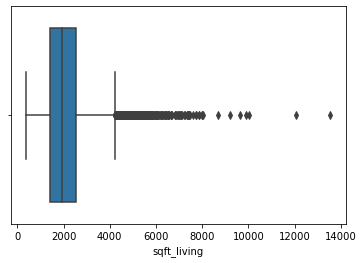

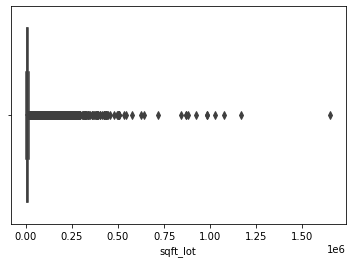

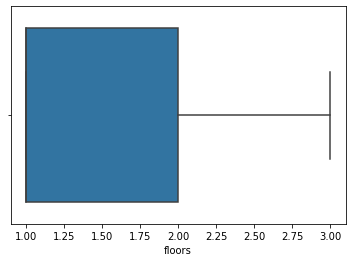

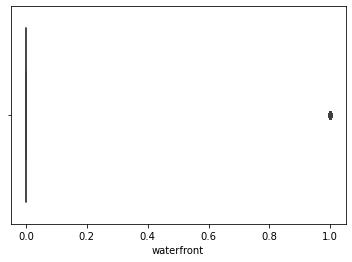

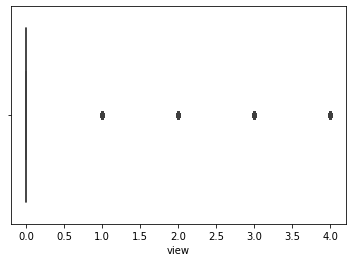

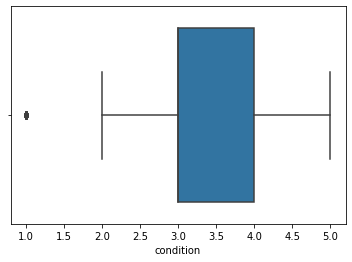

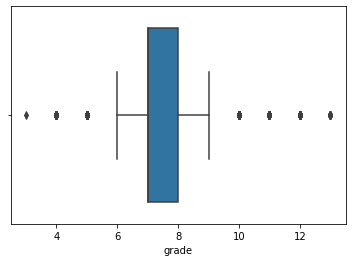

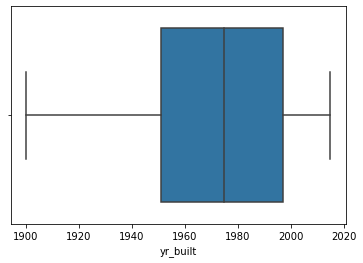

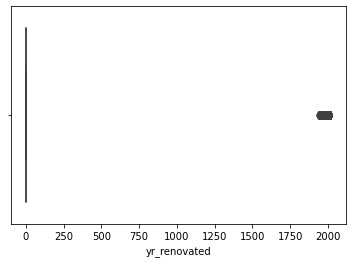

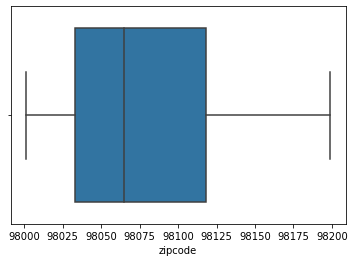

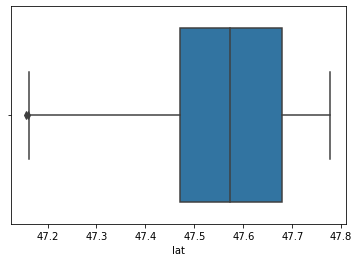

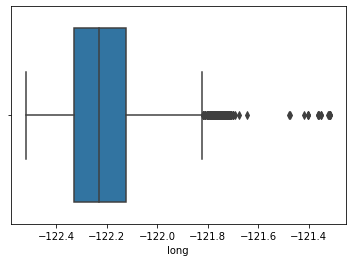

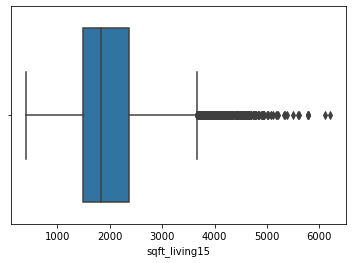

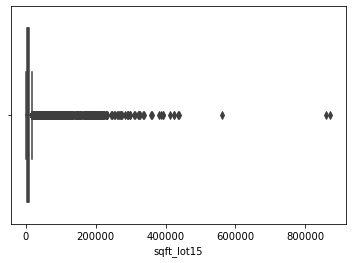

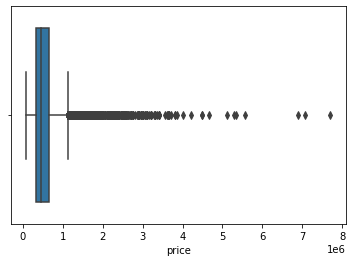

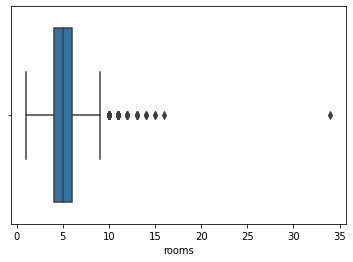

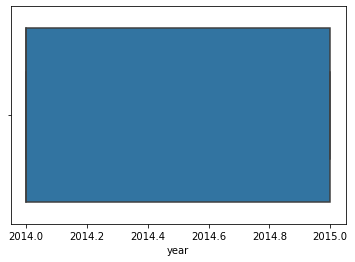

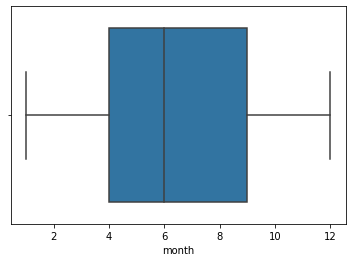

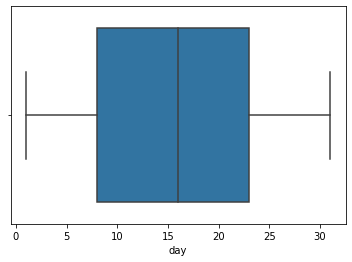

In [69]:
for col in data.select_dtypes(np.number).columns:
    sns.boxplot(data[col])
    plt.show()

In [70]:
X = data.drop(['price'], axis=1)
y = data['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2738.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:10:12   Log-Likelihood:            -2.9455e+05
No. Observations:               21597   AIC:                         5.891e+05
Df Residuals:                   21578   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.629e+07   1.01e+07     -6.583

In [71]:
def r_model (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('Linear Regression:', r2_score(y_test, predictions))

    model = KNeighborsRegressor(n_neighbors=4)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('KNeighborsRegressor ', model.score(X_test, y_test))

    model = MLPRegressor()
    model.fit(X_train, y_train)
    expected_y  = y_test
    predicted_y = model.predict(X_test)
    print('MLP Regressor:',r2_score(expected_y, predicted_y))

In [72]:
r_model(X,y)

Linear Regression: 0.6972880949436551
KNeighborsRegressor  0.4869281107920125
MLP Regressor: 0.5361455745473576


In [ ]:
data.info()

### Results are not as stellar. Let's see if we can increase the scores with processing the data more

In [73]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [74]:
data, _ci = boxcox_transform(data)
data.head(2)

ValueError: Data must not be constant.